<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/18-stable-diffusion.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/18-stable-diffusion.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/raw/master/tutorials/18-stable-diffusion.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table><br><br>

In [2]:
# Import dependencies
import os

### Connect to EvaDB

In [3]:
%pip install --quiet "evadb[document,notebook]"
import evadb
cursor = evadb.connect().cursor()

Note: you may need to restart the kernel to use updated packages.


### Get Input Prompt from User

In [4]:
# to collect all user prompts
def get_user_input():
    print('Welcome to EvaDB!')
    print('Enter your image prompts one by one; type \'exit\' to stop entering prompts.')
    print('========================================')
    prompts = []
    prompt=None

    # receive all prompts from user
    while True:
        prompt = input(
            'Enter prompt: '
        ).strip()
        if prompt in ['Exit', 'exit', 'EXIT']:
            break
        prompts.append(prompt)
        print(prompt)

    return prompts

In [5]:
# getting user input
prompts = get_user_input()

Welcome to EvaDB!
Enter your image prompts one by one; type 'exit' to stop entering prompts.
Yellow leaf floating in a river


### Set API Token Environment Variable

In [6]:
# to set the replicate API token environment variable
def set_replicate_token() -> None:
    key = input('Enter your Replicate API Token: ').strip()

    try:
        os.environ['REPLICATE_API_TOKEN'] = key
        print('Environment variable set successfully.')
    except Exception as e:
        print("❗️ Session ended with an error.")
        print(e)
        print("===========================================")

In [7]:
# setting api token as env variable
set_replicate_token()

Environment variable set successfully.


### Load the Stable Diffusion UDF

In [8]:
# set up the stable diffusion UDF available at functions/stable_diffusion.py
cursor.query("""CREATE FUNCTION IF NOT EXISTS StableDiffusion
            IMPL  '../evadb/functions/stable_diffusion.py';
                """).execute()

### Create Table

In [9]:
# # delete the table if it already exists
cursor.query("""DROP TABLE IF EXISTS ImageGen
                """).execute()

# create the table specifying the type of the prompt column
cursor.query("""CREATE TABLE IF NOT EXISTS ImageGen (
             prompt TEXT)
                """).execute()

### Load Prompts into Table

In [10]:
# insert the prompts into the table
for prompt in prompts:
    cursor.query(f"""INSERT INTO ImageGen (prompt) VALUES ('{prompt}')""").execute()

### Run Stable Diffusion on the Prompts

In [11]:
# run stable diffusion on the prompts
table = cursor.table("ImageGen").select("StableDiffusion(prompt)").df()

### Visualize the Generated Image(s)

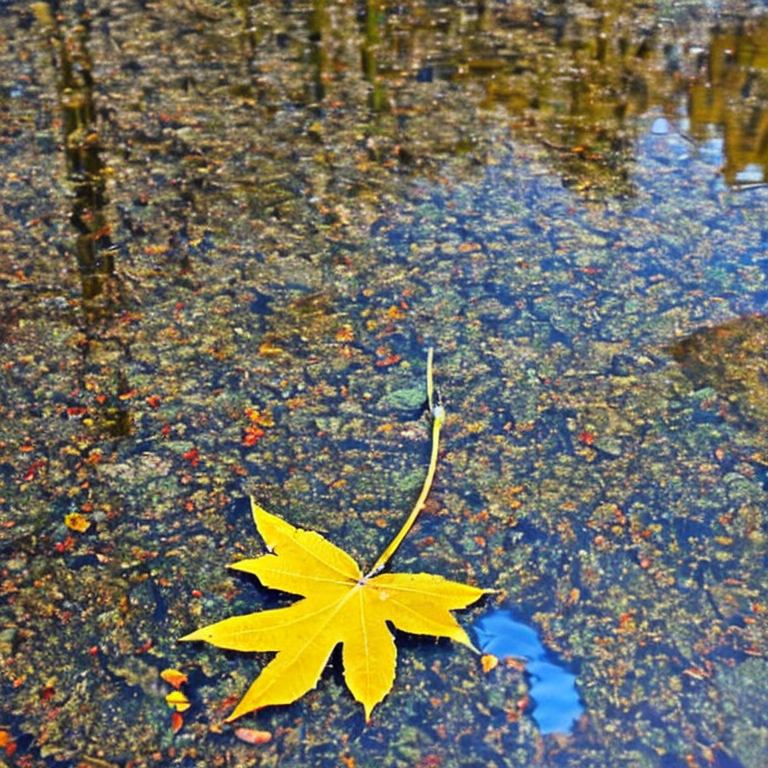

In [12]:
from PIL import Image
Image.fromarray(table[table.columns[0]][0])